# BLM example

In [1]:
# Add pytwoway to system path, do not run this
# import sys
# sys.path.append('../../..')

In [2]:
# Import the pytwoway package 
# (Make sure you have installed it using pip install pytwoway)
import pytwoway as tw
from matplotlib import pyplot as plt

## Simulate some data

The package contains functions to simulate data. We use this here to keep things simple.

In [3]:
# For the example, we simulate data
# Set parameter choices
nl = 2 # Number of worker types
nk = 3 # Number of firm types
fsize = 10 # Max number of employees at a firm
mmult = 100 # Increase observations for movers x100
smult = 100 # Increase observations for stayers x100
blm_true = tw.BLMModel({
    'nl': nl, # Number of worker types
    'nk': nk, # Number of firm types
    'simulation': True # Simulating data
})
sim_data = blm_true._m2_mixt_simulate_sim(fsize=fsize, mmult=mmult, smult=smult)
display(sim_data['jdata'])
display(sim_data['sdata'])

,l,y1,y2,g1,g2,g1true,g2true,j1,j2
0,1,0.463652,1.554466,0,0,0,0,F53,F81
1,1,1.324198,0.457572,0,0,0,0,F49,F99
2,1,0.631847,0.674330,0,0,0,0,F101,F97
3,1,0.874247,0.834825,0,0,0,0,F39,F27
4,1,0.584503,1.504783,0,0,0,0,F20,F11
...,...,...,...,...,...,...,...,...,...
8995,0,1.288463,1.142129,2,2,2,2,F88,F38
8996,0,1.208359,0.538587,2,2,2,2,F64,F25
8997,0,0.978188,0.984181,2,2,2,2,F44,F29
8998,0,1.296872,1.405704,2,2,2,2,F69,F46


,k,y1,y2,g1,g2,x,j1,g1true,j2
0,0,0.500026,1.191067,0,0,1,F71,0,F71
1,1,0.399829,0.915988,0,0,1,F44,0,F44
2,1,0.957044,0.355539,0,0,1,F18,0,F18
3,1,0.879591,0.468131,0,0,1,F87,0,F87
4,1,0.829408,-0.123937,0,0,1,F82,0,F82
...,...,...,...,...,...,...,...,...,...
2995,1,0.782145,2.004921,2,2,1,F57,2,F57
2996,0,1.354498,1.953662,2,2,1,F42,2,F42
2997,1,1.393122,1.033156,2,2,1,F98,2,F98
2998,1,0.725057,1.627661,2,2,1,F77,2,F77


## Initialize and run BLMEstimator

In [4]:
## Optional Parameters ##
user_blm = {
    # Class parameters
    'nl': nl, # Number of worker types
    'nk': nk, # Number of firm types
    'fixb': False, # Set A2 = np.mean(A2, axis=0) + A1 - np.mean(A1, axis=0)
    'stationary': False, # Set A1 = A2
    # fit() parameters
    'n_iters': 100, # Max number of iterations
    'threshold': 1e-7, # Threshold to break EM loop
    'd_prior': 1.0001, # Value >= 1, account for probabilities being too small
    'verbose': 0, # If 0, print no output; if 1, print additional output; if 2, print maximum output
}
# Initialize BLM estimator
blm_fit = tw.BLMEstimator(user_blm)
# Fit BLM estimator
blm_fit.fit(jdata=sim_data['jdata'], sdata=sim_data['sdata'], n_init=20, n_best=5, ncore=4)

100%|██████████| 20/20 [00:06<00:00,  3.17it/s]


## Finally, we can investigate the results

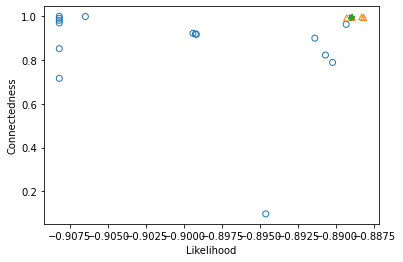

In [5]:
# Plot likelihood vs. connectedness
blm_fit.plot_liks_connectedness()

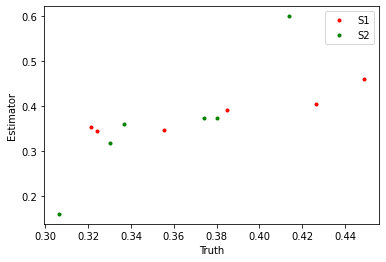

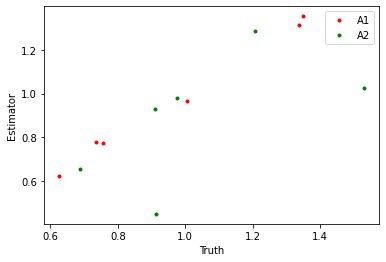

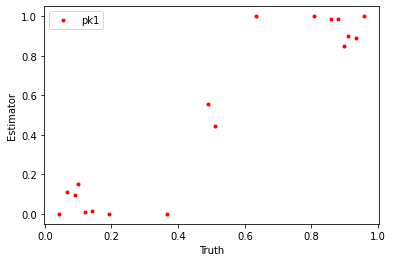

In [6]:
# Plot parameter truth vs. estimates
plt.plot(blm_true.S1.flatten(), blm_fit.model.S1.flatten(), '.', label='S1', color='red')
plt.plot(blm_true.S2.flatten(), blm_fit.model.S2.flatten(), '.', label='S2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimator')
plt.legend()
plt.show()

plt.plot(blm_true.A1.flatten(), blm_fit.model.A1.flatten(), '.', label='A1', color='red')
plt.plot(blm_true.A2.flatten(), blm_fit.model.A2.flatten(), '.', label='A2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimator')
plt.legend()
plt.show()

plt.plot(blm_true.pk1.flatten(), blm_fit.model.pk1.flatten(), '.', label='pk1', color='red')
plt.xlabel('Truth')
plt.ylabel('Estimator')
plt.legend()
plt.show()